# ASPP 2021
## Advanced Numpy Excercises Topic 2


In [2]:
# Make sure that plots are displayed in the notebook
%matplotlib inline

# plotting library
from matplotlib import pyplot as plt
# for obvious reasons
import numpy as np

# a small number of handy tools that may be useful for these exercises
import tools

# if you get stuck, try hints.gimme(exersize_nr)
import hints 

In [5]:
# library for loading pictures
from PIL import Image

def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img, dtype="int32")
    return data

## Topic 2: Indexing Excersizes

**2.5** Recreate the following plots using the following procedure. Make a canvas with `np.zeros`. Then change the values of some of the elements to 1. Then plot using `plt.matshow()`.

![Alt text](patterns.png)


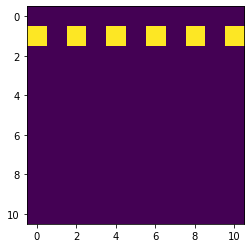

In [52]:
# solution cell
e1 = np.zeros((11,11))
e1[1,::2] = 1
plt.matshow(e1)
plt.savefig("pattern1.png")

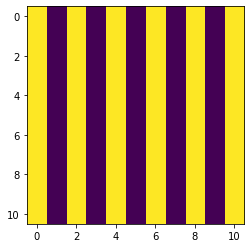

In [53]:
# solution cell
e2 = np.zeros((11,11))
e2[:,::2] = 1
plt.imshow(e2)
plt.savefig("pattern2.png")

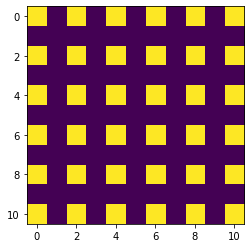

In [54]:
# solution cell
e3 = np.zeros((11,11))
e3[::2,::2] = 1
plt.imshow(e3)
plt.savefig("pattern3.png")

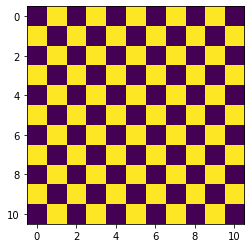

In [55]:
# solution cell
e4 = np.zeros((11,11))
e4[::2,1::2] = 1
e4[1::2,::2] = 1
plt.imshow(e4)
plt.savefig("pattern4.png")

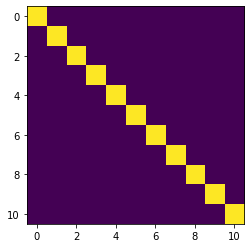

In [56]:
# solution cell

# ex 5, option 1
e5_y, e5_x = np.mgrid[0:11,0:11]
e5 = np.zeros((11,11))
e5[e5_x==e5_y] = 1
plt.imshow(e5)
plt.savefig("pattern5.png")

In [ ]:
# ex 5, option 2
e5 = np.zeros((11,11))
diag = np.arange(11)
e5[diag, diag] = 1
plt.imshow(e5)
plt.savefig("pattern5b.png")

**2.6** use the `load_image` function above to load the example image "pig.jpg". Examine the shape and use matplotlib's `plt.imshow` to plot it

(3169, 4762, 3)


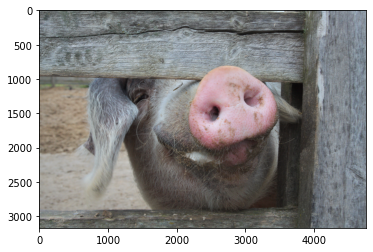

In [15]:
# solution cell
im = load_image("pig.jpg")
print(im.shape)
plt.imshow(im)

**2.7** Plotting takes a long time! Let's try only plotting every third pixel!

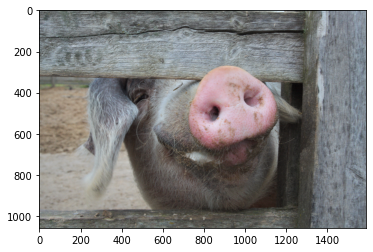

In [16]:
# solution cell
plt.imshow(im[::3,::3,:])

**2.8** You will have noticed that the image shape has 3 dimensions: x, y (the number of pixels) and z = 3. The third dimension represents the three color channels: red, green and blue. Try making the pig's world a bit more rosy. Amp up the red channel by 50% and plot the result.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


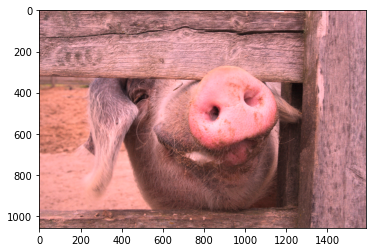

In [17]:
mod_im = im.copy()
mod_im[:,:,0] = mod_im[:,:,0] * 1.5 

plt.imshow(mod_im[::3,::3,:])

**2.9** As you've seen you can change the displayed color of each pixel by changing the value in the R, G or B channels. Draw a black cross on the pig's nose.

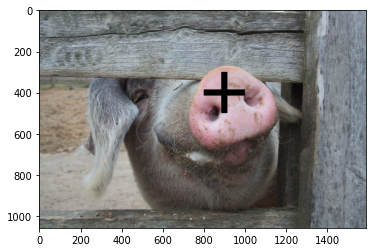

In [18]:
mod_im = im[::3,::3,:].copy()
mod_im[300:500, 885:915, :] = 0
mod_im[385:415, 800:1000, :] = 0
plt.imshow(mod_im)

**2.10** In vision science, we have the concept of a saliency map. It is a grid where each point indicates how likely a pixel in the image is to be looked at. 

The vectors `x` and `y` contain fixation positions in pixels. We also load a saliency map `saliency` that shows the fixation probability at each point.

Evaluate how likely each of these fixations is given the saliency map, by checking the value of the saliency at the fixation position. (The numbers that you get should be negative, since the saliency represents the log likelihood!)

You will not need to use a for loop fot this.

In [6]:
# This code generates a colormap that is transparent for small values and less transparent for large values. 
# It may be useful to overlay the image with the saliency map
import matplotlib.colors as mcolors
colors = [(0.2, 0.8, 0.1, c) for c in np.linspace(0, 1, 10)** 0.7]
cmap_transparent = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=10)

In [9]:
x = [240 , 400, 450, 200, 100]
y = [250, 7, 310, 150, 130]
saliency = np.load("pig_density.npy")
im = load_image("pig_small.jpg")

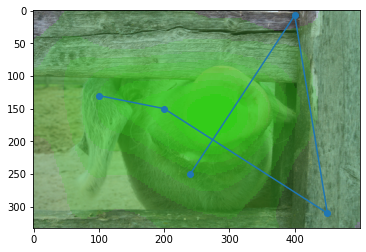

In [12]:
# solution cell
mod_im = im[::3,::3,:].copy()
plt.imshow(im)
plt.imshow(saliency, cmap=cmap_transparent)
plt.scatter(x,y)
plt.plot(x,y)

In [23]:
# solution cell
probabilities = saliency[y, x]
print(probabilities)

[-12.560943  -15.514331  -14.5677595 -10.518977  -12.315224 ]


**2.11** (optional)
On a 100\*100 grid, draw a circle.

In an x–y Cartesian coordinate system, the circle with centre coordinates (a, b) and radius r is the set of all points (x, y) such that `(x-a)**2 + (y-b)**2 = r**2`


In [ ]:
# solution cell
center = (50, 50)
radius = 20

y, x = np.mgrid[1:100, 1:100]
x -= 50
y -= 50

circle = (x**2)+(y**2)

plt.imshow(circle<=radius**2)